In [1]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier



In [2]:
data=pd.read_csv(r"C:\Users\xazar\Downloads\parkinsons_data.txt")
data.head()
data.isnull().values.any()

#scale is needed

False

In [3]:
print(data.shape)

(195, 24)


In [4]:
data_l=data.status.values

In [5]:
print(data_l)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]


In [6]:
#data_f=data.iloc[:, data.columns != 'status' and data.columns !='name']
#data_f=data.iloc[:, data.columns != 's']
data_f=data.loc[:, ~data.columns.isin(['status', 'name'])].values 
#data_f=data.loc[:, ~data.columns.isin(['status'])].values



In [7]:
data_f.shape

(195, 22)

In [8]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_f)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(data_scaled, data_l, test_size=0.5, random_state=2) #random_state option added to keep same distribution in multiple code running
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.4, random_state=2)

In [10]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(97, 22)
(40, 22)
(58, 22)


In [11]:
#model = LogisticRegression()
#rfe = RFE(model, 10)
#fit = rfe.fit(x_train, y_train)
#print("Num Features: %s" % (fit.n_features_))
#print("Selected Features: %s" % (fit.support_))
#print("Feature Ranking: %s" % (fit.ranking_))

In [12]:
estimator =  SVR(kernel="linear", C=100)
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(x_train, y_train)

#print(selector.ranking_)
print(selector.support_ )


[ True False False  True  True False False  True  True False  True False
  True False False False False False  True False False False]


In [13]:
#preparing train, validation and test data with only important features provided by RFECV
x_strain=x_train[:, selector.support_]
x_sval=x_val[:, selector.support_]
x_stest=x_test[:, selector.support_]



[ True False False  True  True False False  True  True False  True False
  True False False False False False  True False False False]


[0.10989622 0.04759658 0.05702336 0.02500411 0.0514383  0.02366329
 0.02812853 0.02549031 0.03018786 0.03192049 0.02698139 0.02638589
 0.04284915 0.02846386 0.02201974 0.03183973 0.03435991 0.03531432
 0.14513517 0.04707091 0.02808333 0.10114755]


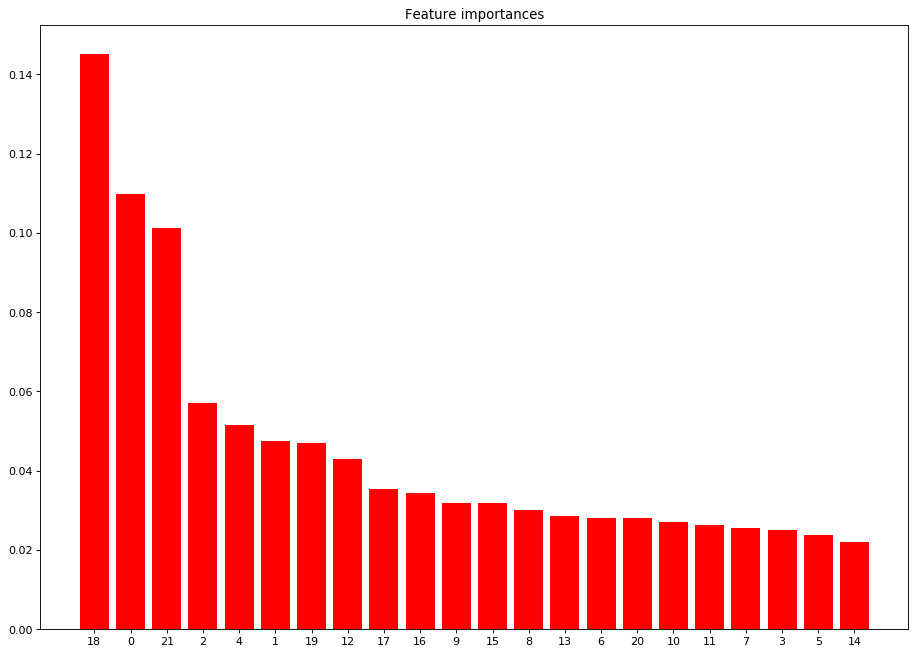

In [15]:
etc = ExtraTreesClassifier(n_estimators=300)
etc.fit(x_train, y_train)
print(etc.feature_importances_)
indices = np.argsort(etc.feature_importances_)[::-1]
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w')
plt.title("Feature importances")
plt.bar(range(data_f.shape[1]), etc.feature_importances_[indices],
       color="r", align="center")
plt.xticks(range(data_f.shape[1]), indices)
plt.show()




In [16]:
#preparing train, validation and test data with only important features provided by forest of trees
extree=[0]*22
i=0
while i<22:
    if(i<8):
        extree[indices[i]]=True
    else:
        extree[indices[i]]=False
    i=i+1

print(extree)

x_exval=x_val[:, extree]
x_extrain=x_train[:, extree]
x_extest=x_test[:, extree] 


[True, True, True, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, False, True]


In [17]:
my=0
say=0
while my<len(extree):
    if(extree[my] and selector.support_[my]):
        say=say+1
    
    my=my+1

print(say) #how many common important features provided by RFECV and forest of trees

4


In [77]:
k=[1,3,5,7]
acc=[0]*5



In [78]:
i=0
while i<len(k):
    # we create an instance of Neighbours Classifier and fit the data.
        knn= KNeighborsClassifier(n_neighbors=k[i])
        knn.fit(fmerge_full, lmerge)
        y_res=knn.predict(x_test)
        print('Prediction accuracy for k=',k[i],': ', metrics.accuracy_score(y_test, y_res))
        print('Classification report for k=',k[i],': \n', classification_report(y_test,y_res)) 
        i=i+1
        


Prediction accuracy for k= 1 :  0.9655172413793104
Classification report for k= 1 : 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.96      1.00      0.98        48

    accuracy                           0.97        58
   macro avg       0.98      0.90      0.93        58
weighted avg       0.97      0.97      0.96        58

Prediction accuracy for k= 3 :  0.9655172413793104
Classification report for k= 3 : 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.96      1.00      0.98        48

    accuracy                           0.97        58
   macro avg       0.98      0.90      0.93        58
weighted avg       0.97      0.97      0.96        58

Prediction accuracy for k= 5 :  0.9482758620689655
Classification report for k= 5 : 
               precision    recall  f1-score   support

           0       1.00      0.70

In [33]:

def mytest(algo):  
    C = [ 0.1, 1, 10, 100,1000]
    count=0
    accl=[0]*7
    while count<len(C):
        lsvc = SVC(C=C[count], kernel=algo)
        lsvc.fit(x_train, y_train)
        lres=lsvc.predict(x_val)
        print('Classification report for C=',C[count],': ', classification_report(y_val,lres))
        #accl[count]=classification_report(y_val,lres)           
        count=count+1
        
    
    
   
   
    

mytest('rbf')



Classification report for C= 0.1 :                precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.65      1.00      0.79        26

    accuracy                           0.65        40
   macro avg       0.33      0.50      0.39        40
weighted avg       0.42      0.65      0.51        40

Classification report for C= 1 :                precision    recall  f1-score   support

           0       0.78      0.50      0.61        14
           1       0.77      0.92      0.84        26

    accuracy                           0.78        40
   macro avg       0.78      0.71      0.73        40
weighted avg       0.78      0.78      0.76        40

Classification report for C= 10 :                precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.80      0.92      0.86        26

    accuracy                           0.80        40
   macro avg       0.80

C:\Users\xazar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:


def tuning(train_data, labels, target_feature, target_label, cv=3): #as cv is 3 by default
        svc_parameters = [{'kernel': ['rbf'], 'gamma': [0.001,0.01, 0.1, 1],
                             'C': [0.1, 1, 10, 100, 1000]}] #these values produced better results in accuracy
        
        scores = ['precision', 'recall']
        
        for score in scores:
            print("# Tuning hyper-parameters for %s" % score)
            print()
        
            clf = GridSearchCV(SVC(), svc_parameters, cv=cv,
                               scoring='%s_macro' % score)
            clf.fit(train_data, labels)
        
            print("Best parameters set found on development set:")
            print()
            print(clf.best_params_)
            print()
            print("Grid scores on development set:")
            print()
            means = clf.cv_results_['mean_test_score']
            stds = clf.cv_results_['std_test_score']
            for mean, std, params in zip(means, stds, clf.cv_results_['params']):
                print("%0.3f (+/-%0.03f) for %r"
                      % (mean, std * 2, params))
            print()
        
            print("Detailed classification report:")
            print()
            print("The model is trained on the full development set.")
            print("The scores are computed on the full evaluation set.")
            print()
            y_true, y_pred = target_label, clf.predict(target_feature)
            print(classification_report(y_true, y_pred))
            print()
    
    # for diagnosis problem recall is more important feature than precision so we should maximize recall

In [22]:
fmerge=np.concatenate((x_extrain,x_exval)) # merged train features WITH feature selection
lmerge=np.concatenate((y_train,y_val)) # merged train and vald labels # same for with and without feature selection
fmerge_full=np.concatenate((x_train, x_val)) #merged train features WITHOUT feature selection

print(fmerge.shape, lmerge.shape, fmerge_full.shape)


(137, 8) (137,) (137, 22)


In [79]:
tuning(fmerge_full, lmerge, x_test, y_test)

# Tuning hyper-parameters for precision



C:\Users\xazar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xazar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xazar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xazar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedM

Best parameters set found on development set:

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Grid scores on development set:

0.361 (+/-0.008) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.361 (+/-0.008) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.361 (+/-0.008) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.361 (+/-0.008) for {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.361 (+/-0.008) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.847 (+/-0.048) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.874 (+/-0.147) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.884 (+/-0.025) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.837 (+/-0.054) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.912 (+/-0.017) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.857 (+/-0.172) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.890 (+/-0.023) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.856 (+/-0.092) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.852 (+/-0.287) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0

In [23]:
def final( C, gamma, train_feature, train_label, target_feature, target_label, kernel='rbf' ):
    clf = SVC(C=C, kernel=kernel, gamma=gamma)
    clf.fit(train_feature, train_label)
    result=clf.predict(target_feature)
    print('Accuracy for c=', C,' and gamma=', gamma, '  is:\n ', metrics.accuracy_score(target_label,result))
    print('Classification report for c=', C,' and gamma=', gamma, '  is: ', classification_report(target_label,result))

In [80]:
final(100, 0.1, fmerge_full, lmerge, x_test, y_test)

Accuracy for c= 100  and gamma= 0.1   is:
  0.9482758620689655
Classification report for c= 100  and gamma= 0.1   is:                precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.96      0.98      0.97        48

    accuracy                           0.95        58
   macro avg       0.92      0.89      0.91        58
weighted avg       0.95      0.95      0.95        58



# 